In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the start and end dates for the data
start_date = '2021-01-01'
end_date = '2024-5-31'

# Fetch the data using yfinance
aapl = yf.download('AAPL', start=start_date, end=end_date)
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.002090,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572342,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244377,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.483994,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592957,105158200
...,...,...,...,...,...,...
2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100


## 시계열데이터(Time serires data analysis)
**1. 분해(Decomposition)**

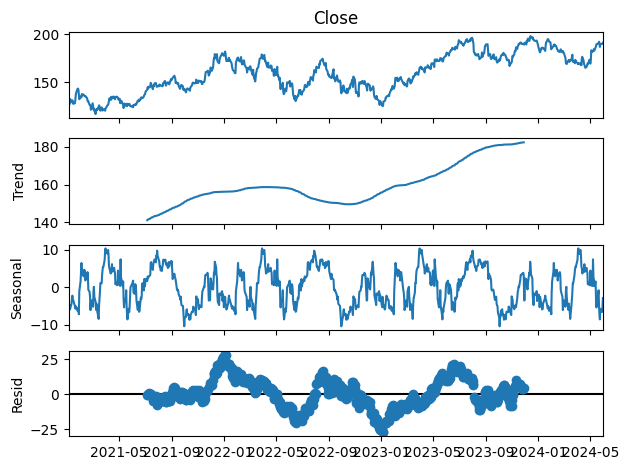

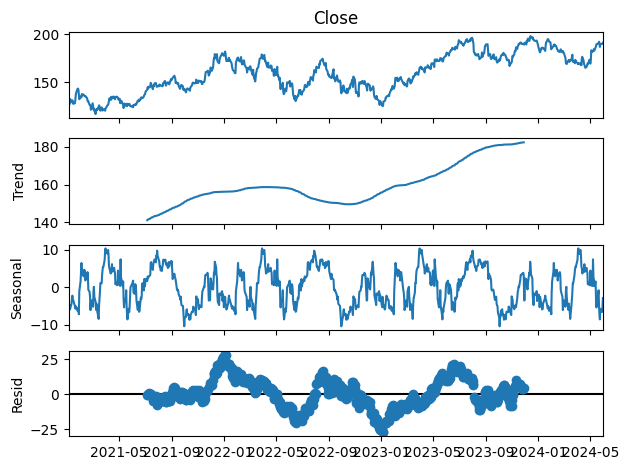

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(aapl['Close'], model='additive', period=252)
decomposition.plot()

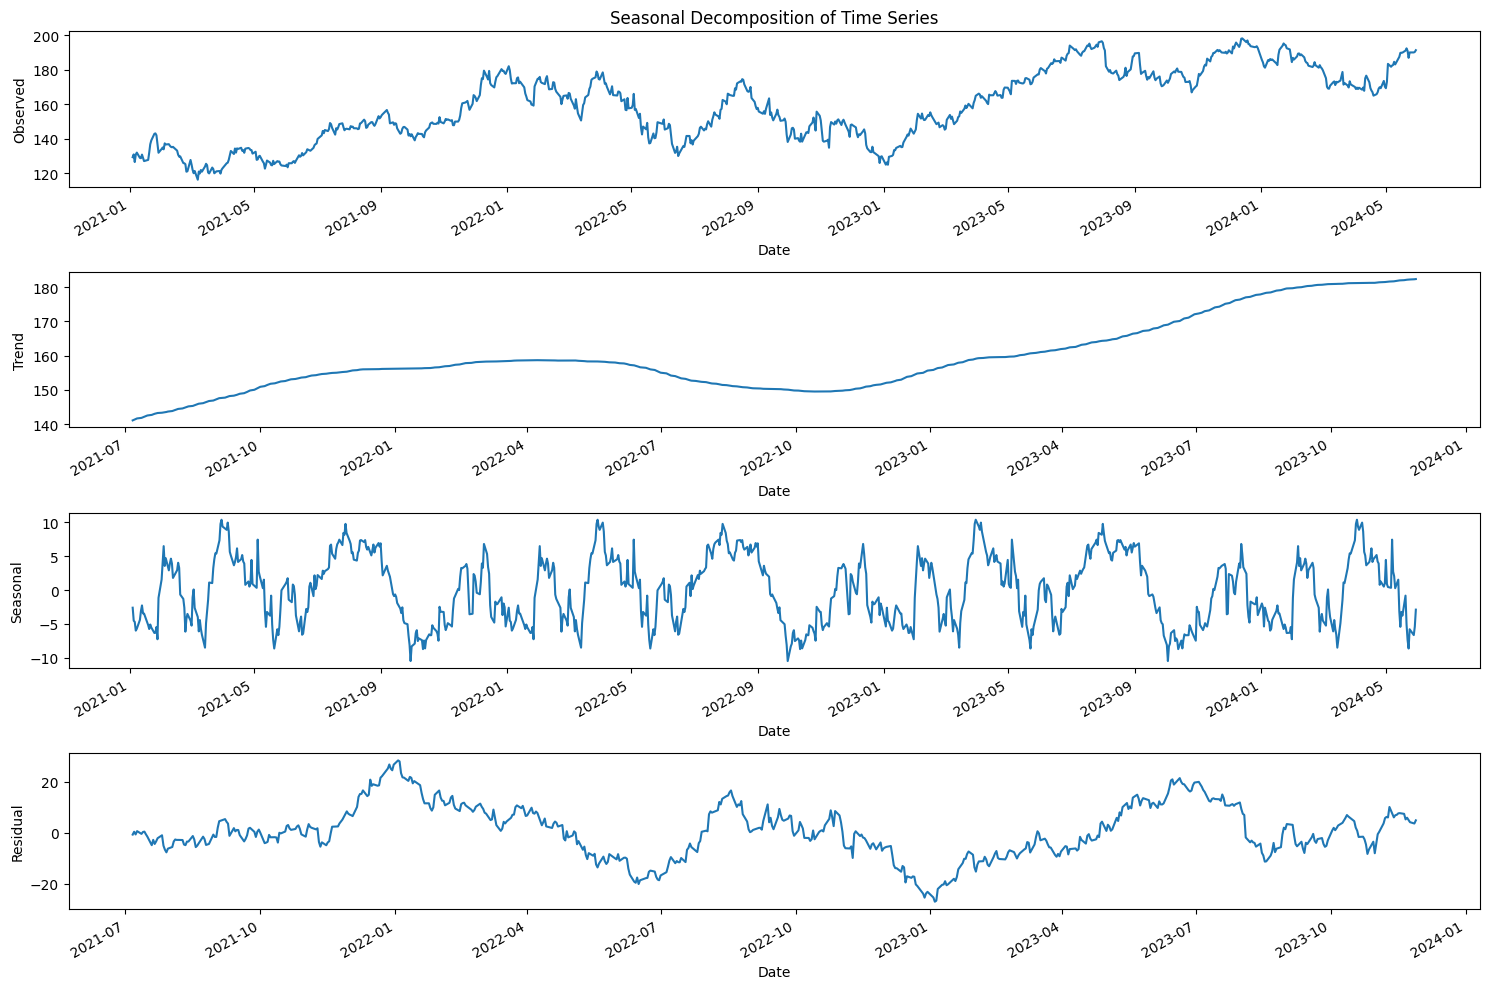

In [10]:
# Enhance the plot

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
decomposition.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition of Time Series')
decomposition.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [17]:
# prompt: Residuals가 예측 가능한지 test

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(decomposition.resid.dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] > 0.05:
    print('Residuals are not stationary')
else:
    print('Residuals are stationary')


ADF Statistic: -2.4919624542195975
p-value: 0.11744221464685972
Residuals are not stationary
